**CASE 2: CUSTOMER RETENTION**



**Name:** Nguyễn Lâm Xuân Hân

**Student ID:** K224141662

**  **

**Declare the library**

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
     
from sklearn.preprocessing import OneHotEncoder 
%matplotlib inline

**Reading the data**

In [5]:
df = pd.read_csv(r'C:\Users\User\Downloads\Case 2 - Customer retention\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Understanding the size of this dataset**

In [7]:
df.shape

(7043, 21)

**Descriptive statistics**

In [7]:
df.describe() 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Feature meaning**

In [9]:
for column in df:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"Unique {column}'s count: {unique_count}")
    print(f"{unique_values}\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

**Column type**

In [11]:
# Display the data type of each column
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [17]:
# Display the data type of each column
print(df.dtypes)

# Separate columns by data type
print("\nData types summary:")
print(df.dtypes.value_counts())

# To print specific information about object and float columns
object_cols = df.select_dtypes(include=['object'])
float_cols = df.select_dtypes(include=['float64'])

print("\nObject data types:")
print(object_cols.dtypes)

print("\nFloat data types:")
print(float_cols.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Data types summary:
object     17
float64     3
int64       1
Name: count, dtype: int64

Object data types:
customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport        

In [13]:
# Convert the 'TotalCharges' column to numeric type, replacing invalid values with NaN
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce')

def convert_features_to_float(features, dataframe):
    # Convert the specified columns to float type
    dataframe[features] = dataframe[features].astype(float)
    return df

# Call the function to convert the 'tenure' column and print the first 5 rows
convert_features_to_float(['tenure'], df).head()

# Check the number of NaN values in the DataFrame
na_counts = df.isna().sum()
print(na_counts)

# Drop any rows with at least one NaN value
df = df.dropna(how='any')

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


**Fivethirtyeight**

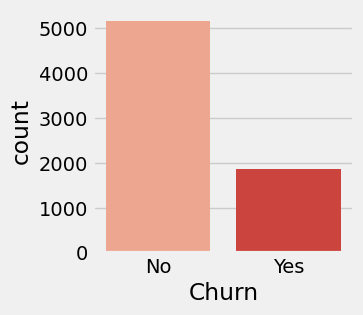

In [15]:
# Apply the Fivethirtyeight style to all plots. 
plt.style.use("fivethirtyeight") 
# Display a frequency distribution for churn.  
plt.figure(figsize=(3, 3)) 
ax = sns.countplot(data=df, x='Churn', hue='Churn', palette="Reds", linewidth=1, legend=False)
plt.show() 

**Bar chart**

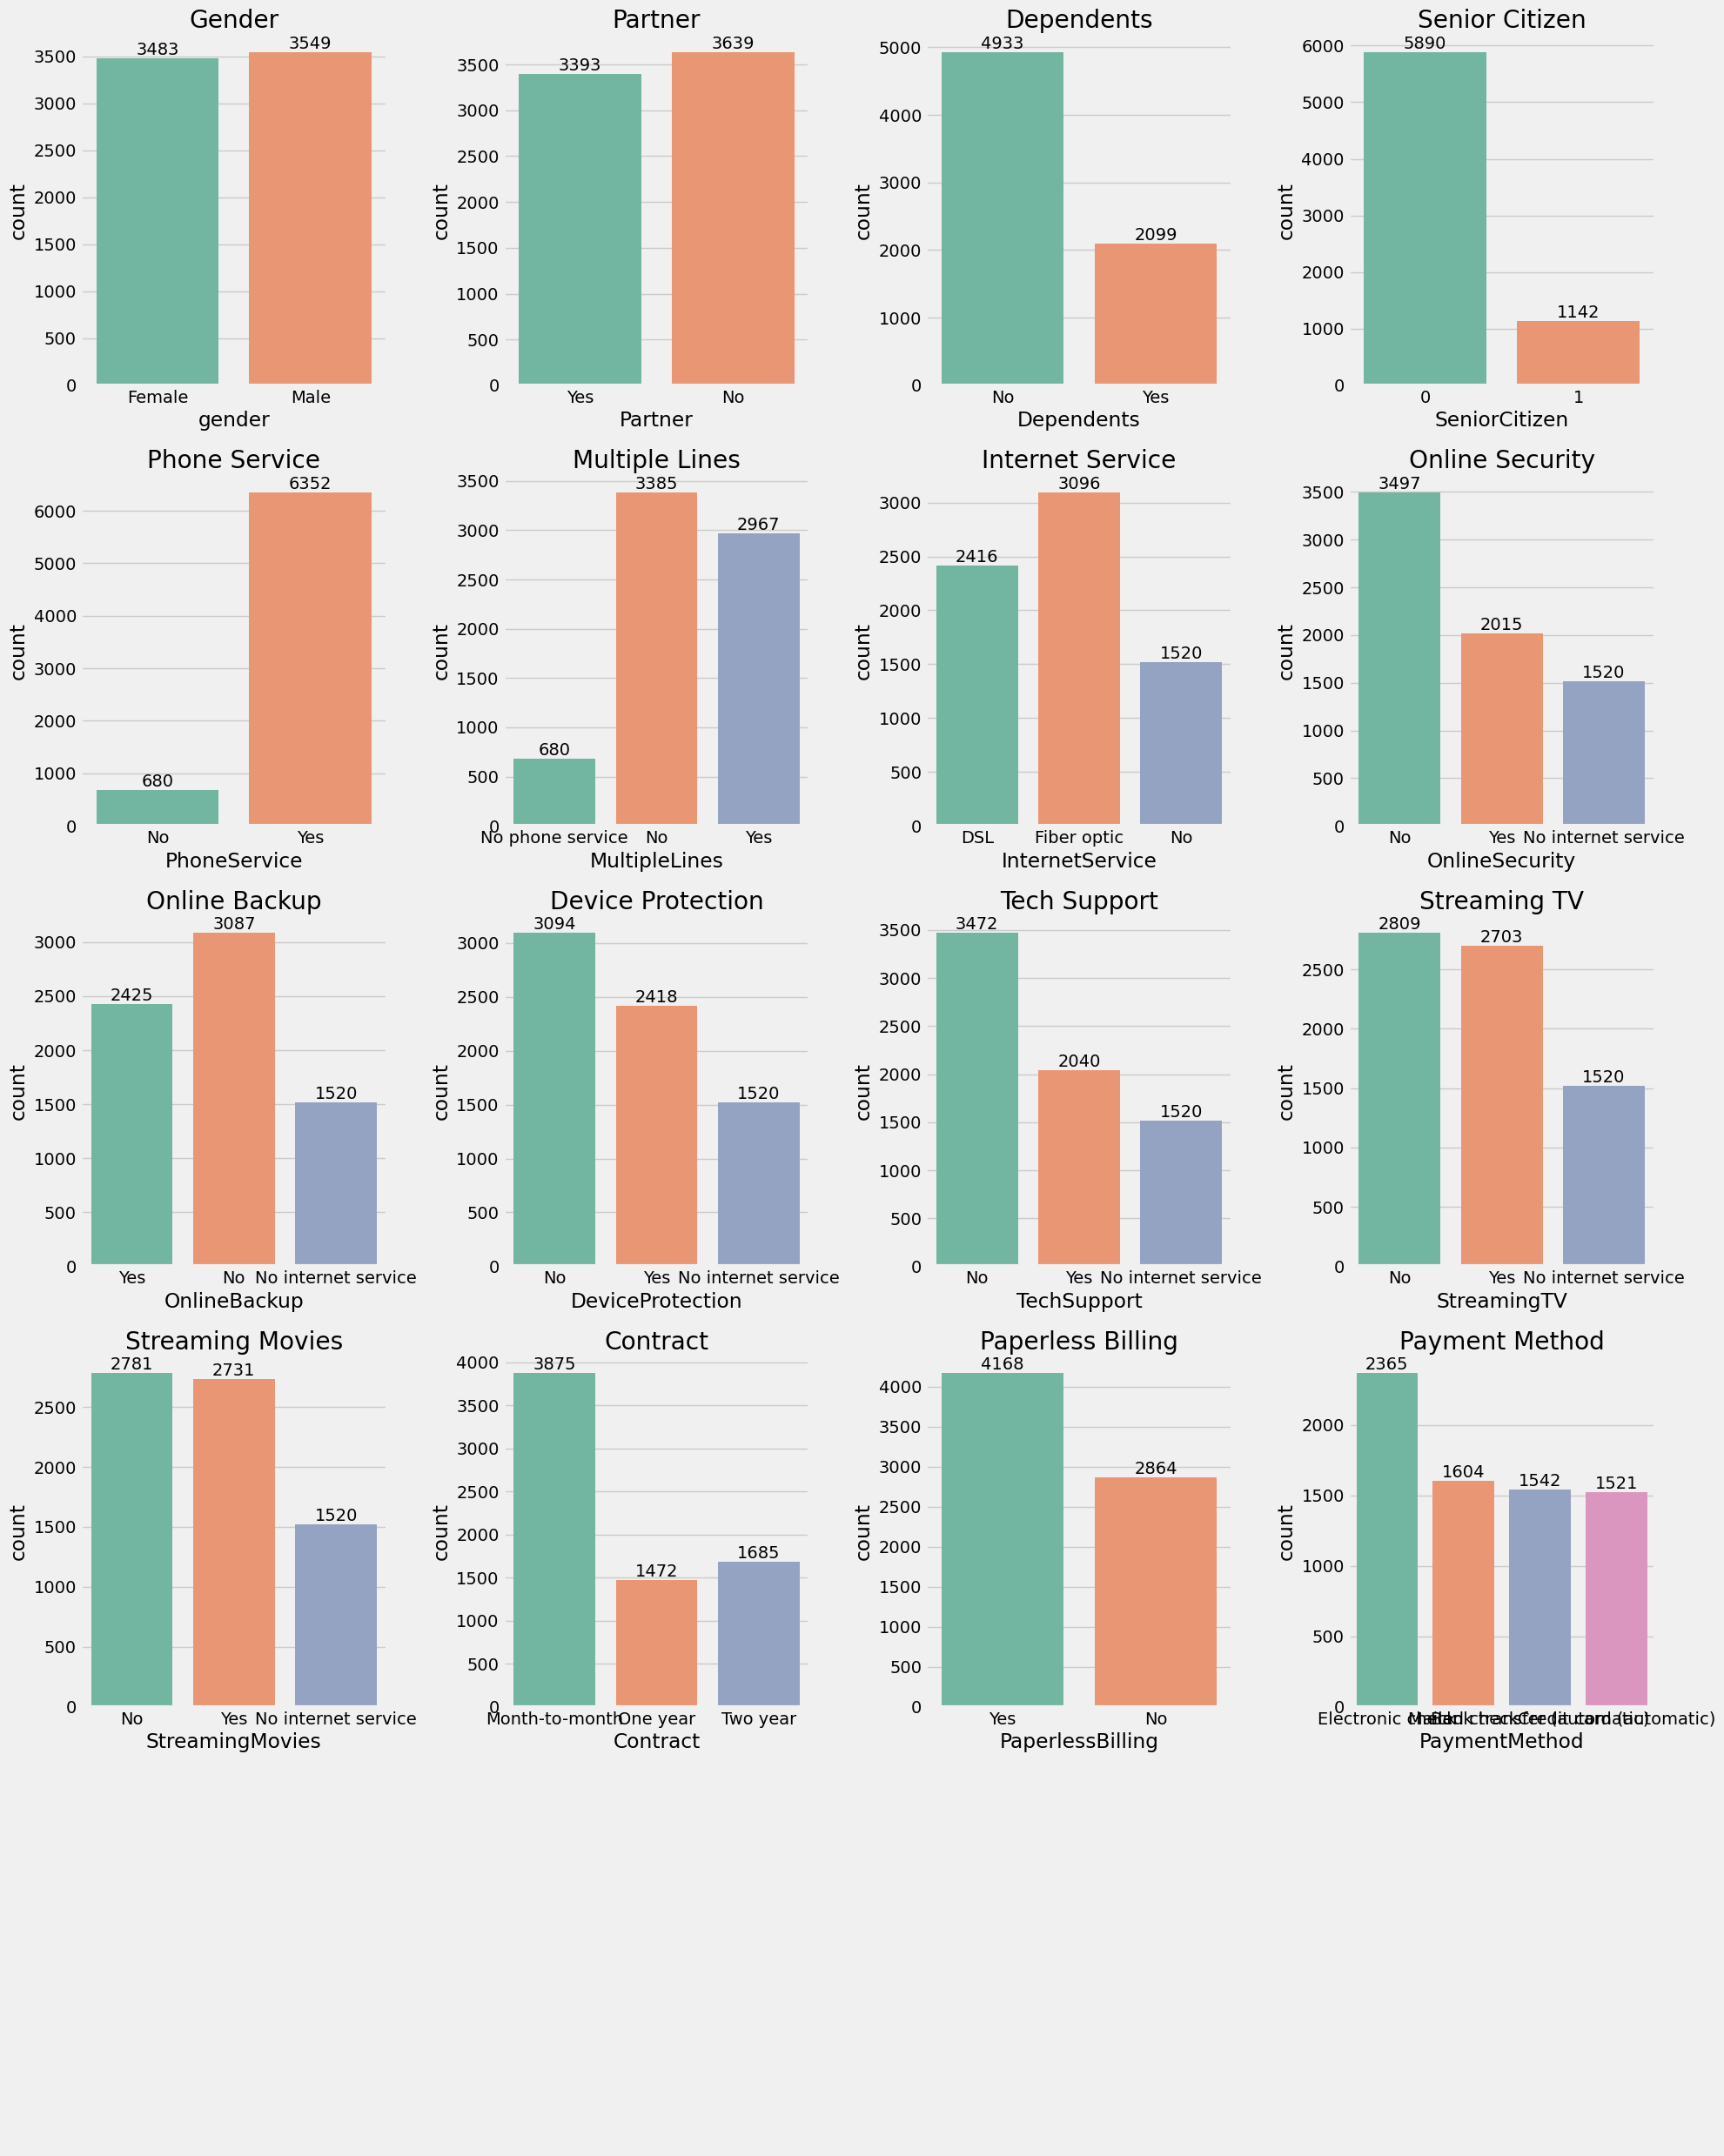

In [45]:
# List of column names and titles for countplots
columns = [
    'gender', 'Partner', 'Dependents', 'SeniorCitizen',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

titles = [
    'Gender', 'Partner', 'Dependents', 'Senior Citizen',
    'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
    'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
    'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'
]

# Create figure and axes
fig, ax = plt.subplots(5, 4, figsize=(20, 25))

# Loop through columns and plot countplots
for i, (col, title) in enumerate(zip(columns, titles)):
    row, col_pos = divmod(i, 4)  # Determine row and column position
    # Generate a unique palette for each column based on its unique values
    unique_values = df[col].unique()
    palette = sns.color_palette("Set2", len(unique_values))

    # Plot countplot with the generated palette, using hue
    sns.countplot(data=df, x=col, hue=col, ax=ax[row][col_pos], palette=palette, dodge=False, legend=False)
    ax[row][col_pos].set_title(title)

    # Add counts on bars
    for patch in ax[row][col_pos].patches:
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        ax[row][col_pos].annotate(int(y), (x, y), ha='center', va='bottom')

# Hide unused subplots
for i in range(len(columns), 20):
    row, col_pos = divmod(i, 4)
    ax[row][col_pos].axis('off')

plt.tight_layout()
plt.show()


**boxplot**

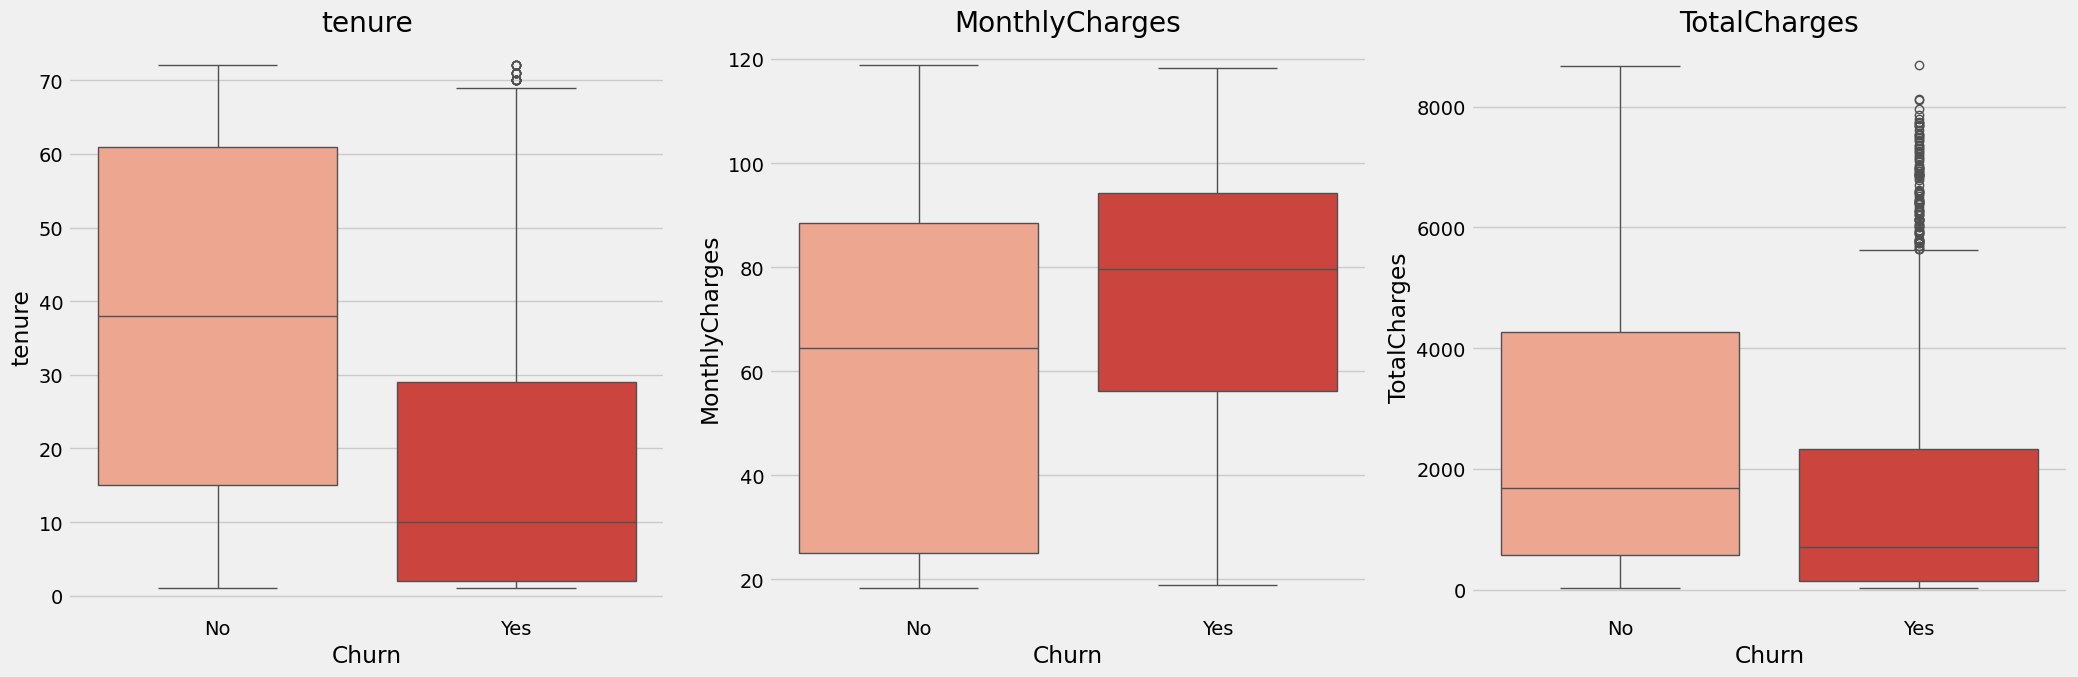

In [31]:
def boxplot(x, y, df):
    # Calculate the number of rows and columns needed for subplots
    num_plots = len(y)
    rows = (num_plots - 1) // 3 + 1  # Determine the number of rows (3 plots per row)
    columns = min(3, num_plots)      # Maximum 3 columns

    plt.figure(figsize=(7 * columns, 7 * rows))

    for i, j in enumerate(y): 
        # Create a subplot at position i+1
        plt.subplot(rows, columns, i + 1)
        
        # Create the boxplot
        ax = sns.boxplot(x=x, y=j, data=df, hue=x, palette="Reds", linewidth=1, dodge=False)
        ax.set_title(j)

        # Check and remove the legend if it exists
        if ax.legend_ is not None:
            ax.legend_.remove()

    plt.tight_layout()  # Adjust the layout to avoid overlap
    plt.show()

# Call the function with the list of y columns
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], df)

**Histogram**

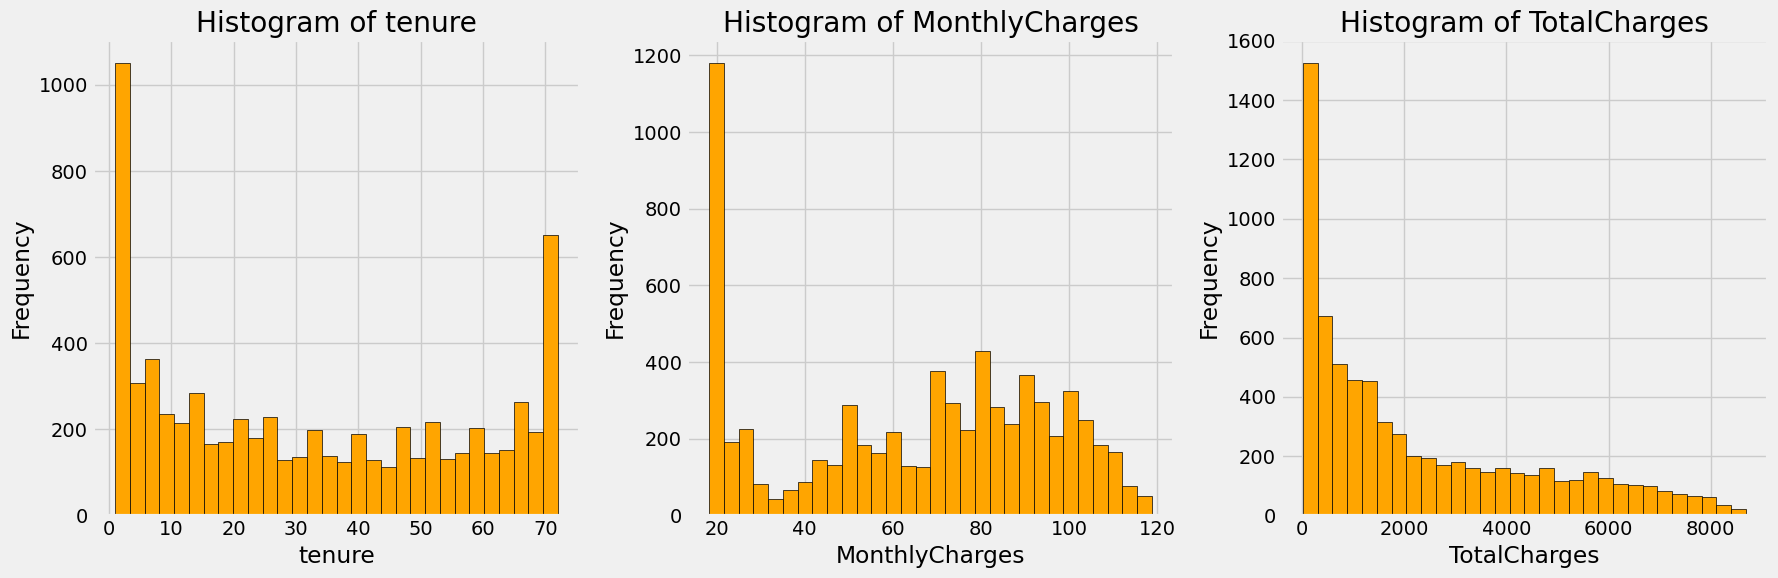

In [21]:
# Define the numerical variables
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a 1x3 grid for the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the width for horizontal layout

# Loop through each variable and plot
for var, ax in zip(numerical_vars, axes):
    ax.hist(df[var], bins=30, color='orange', edgecolor='black')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {var}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Heatmap**

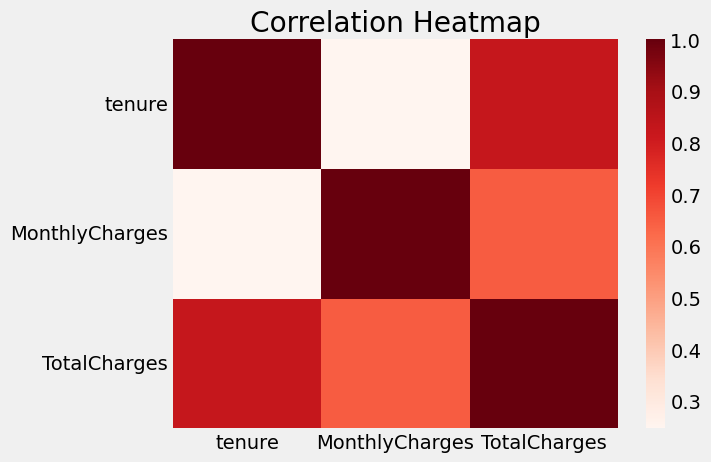

In [23]:
corr = df[numerical_vars].corr() 
 
# Draw heatmap with red
sns.heatmap(corr, cmap='Reds') 
 
plt.title('Correlation Heatmap') 
plt.show()

**scatter plot**

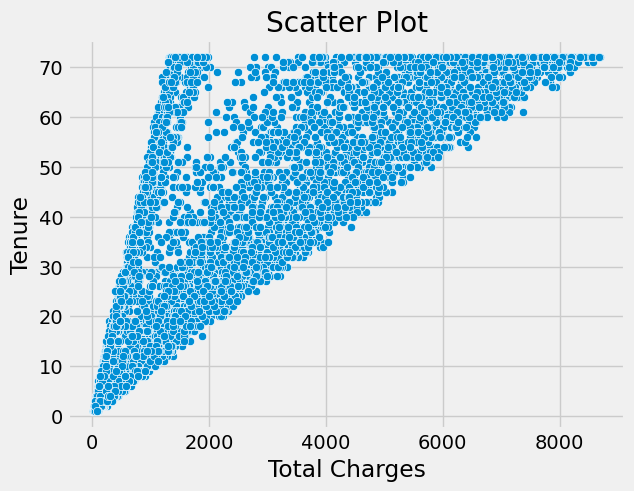

In [25]:
# Create a scatter plot
sns.scatterplot(data=df, x='TotalCharges', y='tenure')

plt.title('Scatter Plot')
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.show()

TotalCharges      1.000000
tenure            0.825880
MonthlyCharges    0.651065
Name: TotalCharges, dtype: float64 



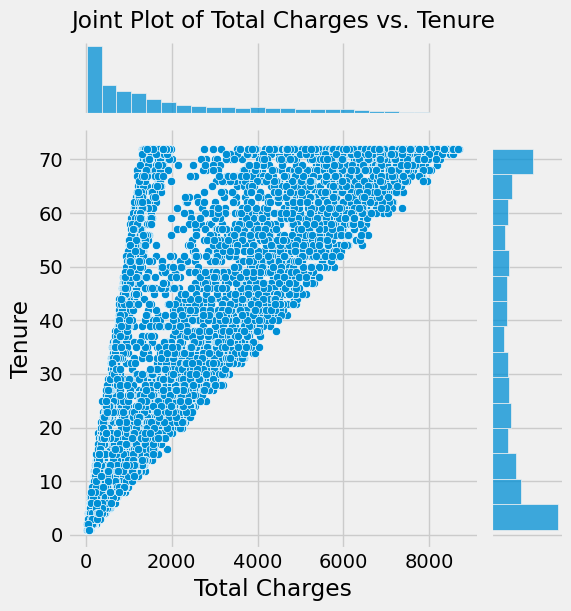

In [27]:
# Calculate correlation and print sorted values
sorted_corr = corr['TotalCharges'].sort_values(ascending=False)
print(sorted_corr, '\n')  # Properly print the sorted correlation

# Create a joint plot
sns.jointplot(data=df, x='TotalCharges', y='tenure', kind='scatter')

plt.suptitle('Joint Plot of Total Charges vs. Tenure', y=1.02)  # Adjust title position
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.show()

In [57]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 5.6 MB/s eta 0:00:23
    --------------------------------------- 2.4/124.9 MB 8.4 MB/s eta 0:00:15
   - -------------------------------------- 3.1/124.9 MB 6.0 MB/s eta 0:00:21
   - -------------------------------------- 3.9/124.9 MB 5.9 MB/s eta 0:00:21
   - -------------------------------------- 4.7/124.9 MB 5.6 MB/s eta 0:00:22
   - -------------------------------------- 6.0/124.9 MB 5.3 MB/s eta 0:00:23
   -- ------------------------------------- 6.8/124.9 MB 5.2 MB/s eta 0:00:23
   -- ------------------------------------- 7.6/124.9 MB 5.0 MB/s eta 0:00:24
   -- ------------------------------------- 8.9/124.9 MB 5.1 MB/s eta 0:00:23
   --- ------------------------------------ 9.7/124.9 MB 5.0 MB/s eta 0:00:24
   --- ------------------------------------ 10.2/124.9 MB 4.8 MB/s eta 0:00:24
   --- ------------------------------------ 10.5/124.9 MB 4.6 MB/s et

**IQR**

In [33]:
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"] 
df_num = df[numerical_features] 
df_num.describe() 
 
Q1 = df_num.quantile(0.25) 
Q3 = df_num.quantile(0.75) 
IQR = Q3 - Q1 
IQR 
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

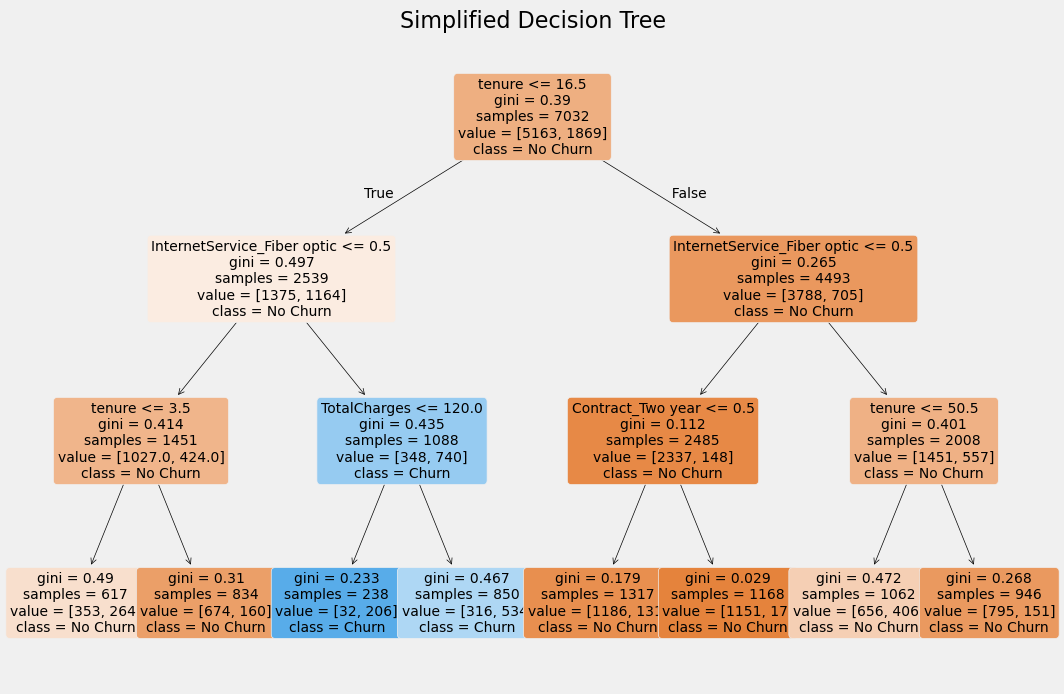

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train Decision Tree model with a smaller depth for clarity
model = DecisionTreeClassifier(max_depth=3, random_state=42)  # max_depth set to 3
model.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))  # Adjust figure size for clarity
plot_tree(
    model, 
    feature_names=X.columns,  # Feature labels
    class_names=['No Churn', 'Churn'],  # Class labels
    filled=True,  # Add colors based on class proportions
    rounded=True,  # Rounded corners for better aesthetics
    fontsize=10  # Adjust font size
)
plt.title("Simplified Decision Tree", fontsize=16)
plt.show()

**Chi-square**

In [35]:
from scipy.stats import chi2_contingency

# Function for Chi-Square test for the relationship between a categorical column and the target "Churn"
def chi_square_test(df, colX, colY, alpha=0.05):
    contingency_table = pd.crosstab(df[colX], df[colY])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-Square test result for {colX} and {colY}: p-value = {p}")
    
    if p < alpha:
        print(f"{colX} is important for prediction")
    else:
        print(f"{colX} is NOT important for prediction")

# Test the relationship between categorical features and "Churn"
categorical_columns = ['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_columns:
    chi_square_test(df, col, 'Churn')


Chi-Square test result for Partner and Churn: p-value = 3.97379757451591e-36
Partner is important for prediction
Chi-Square test result for Dependents and Churn: p-value = 2.0196592017051303e-42
Dependents is important for prediction
Chi-Square test result for MultipleLines and Churn: p-value = 0.0035679273999811405
MultipleLines is important for prediction
Chi-Square test result for InternetService and Churn: p-value = 5.831198962237274e-159
InternetService is important for prediction
Chi-Square test result for OnlineSecurity and Churn: p-value = 1.4006867477839222e-184
OnlineSecurity is important for prediction
Chi-Square test result for OnlineBackup and Churn: p-value = 7.776099238804965e-131
OnlineBackup is important for prediction
Chi-Square test result for DeviceProtection and Churn: p-value = 1.9593887862403176e-121
DeviceProtection is important for prediction
Chi-Square test result for TechSupport and Churn: p-value = 7.407807748843711e-180
TechSupport is important for predicti

**Feature Importance**

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = pd.get_dummies(df.drop(columns=['Churn', 'customerID']), drop_first=True)
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Feature Importance
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance)

TotalCharges                             0.209149
tenure                                   0.206291
MonthlyCharges                           0.177939
InternetService_Fiber optic              0.107369
gender_Male                              0.025474
PaymentMethod_Electronic check           0.024623
Partner_Yes                              0.023731
SeniorCitizen                            0.020231
MultipleLines_Yes                        0.019450
Dependents_Yes                           0.019313
PaperlessBilling_Yes                     0.018392
OnlineSecurity_Yes                       0.018146
OnlineBackup_Yes                         0.014923
TechSupport_Yes                          0.014751
DeviceProtection_Yes                     0.014349
PaymentMethod_Mailed check               0.012833
Contract_One year                        0.012525
StreamingTV_Yes                          0.011575
PaymentMethod_Credit card (automatic)    0.011495
Contract_Two year                        0.010077


**ANOVA test**

In [37]:
from scipy import stats

# Function for ANOVA test for numerical features and the target "Churn"
def anova_test(df, col, target='Churn'):
    churn_yes = df[df[target] == 'Yes'][col]
    churn_no = df[df[target] == 'No'][col]
    
    f_stat, p_value = stats.f_oneway(churn_yes, churn_no)
    
    print(f"ANOVA test result for {col}: F-statistic = {f_stat}, p-value = {p_value}")
    
    if p_value < 0.05:
        print(f"{col} is important for prediction")
    else:
        print(f"{col} is NOT important for prediction")

# Test ANOVA for numerical features
numerical_columns = ['tenure', 'TotalCharges', 'MonthlyCharges']
for col in numerical_columns:
    anova_test(df, col)


ANOVA test result for tenure: F-statistic = 1007.5094314093412, p-value = 9.437650217603554e-207
tenure is important for prediction
ANOVA test result for TotalCharges: F-statistic = 291.3448623664935, p-value = 4.8768656897080145e-64
TotalCharges is important for prediction
ANOVA test result for MonthlyCharges: F-statistic = 271.5769897682043, p-value = 6.760843117999019e-60
MonthlyCharges is important for prediction


**T-test**

In [39]:
from scipy.stats import ttest_ind

# Function for T-Test for numerical features and the target "Churn"
def t_test(df, col, target='Churn'):
    churn_yes = df[df[target] == 'Yes'][col]
    churn_no = df[df[target] == 'No'][col]
    
    t_stat, p_value = ttest_ind(churn_yes, churn_no, equal_var=False)
    
    print(f"T-test result for {col}: t-statistic = {t_stat}, p-value = {p_value}")
    
    if p_value < 0.05:
        print(f"{col} is important for prediction")
    else:
        print(f"{col} is NOT important for prediction")

# Test T-Test for numerical features
for col in numerical_columns:
    t_test(df, col)


T-test result for tenure: t-statistic = -34.97187009750348, p-value = 2.3470747188949526e-234
tenure is important for prediction
T-test result for TotalCharges: t-statistic = -18.80076821738761, p-value = 1.1524944112838114e-75
TotalCharges is important for prediction
T-test result for MonthlyCharges: t-statistic = 18.34091879095257, p-value = 2.6573571445160277e-72
MonthlyCharges is important for prediction


**VIF**

In [41]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for numerical features
numerical_columns = ['tenure', 'TotalCharges', 'MonthlyCharges']
X_numerical = df[numerical_columns]

# Adding a constant for VIF calculation
X_numerical = sm.add_constant(X_numerical)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(X_numerical.values, i) for i in range(X_numerical.shape[1])]
print(vif_data)


          Feature        VIF
0           const  14.973839
1          tenure   5.844646
2    TotalCharges   9.526697
3  MonthlyCharges   3.225293


**train_test_split**

In [18]:
#Applying sklearn's splitter function train_test_split 
from sklearn.model_selection import train_test_split

X1 = df.drop('Churn', axis=1)
X = X1.values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [42]:
pip install mlxtend

  Using cached mlxtend-0.23.3-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.3-py3-none-any.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


**Definition of model evaluation metrics**

In [41]:
from sklearn.metrics import (precision_recall_curve, average_precision_score,
                             roc_curve, roc_auc_score, confusion_matrix, 
                             accuracy_score, classification_report)
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix

# Function to prepare the data
def prepare_data(X_train, X_test):
    X_train_df = pd.DataFrame(X_train)
    X_test_df = pd.DataFrame(X_test)
    
    # Convert categorical features to numeric (if any)
    X_train_encoded = pd.get_dummies(X_train_df)
    X_test_encoded = pd.get_dummies(X_test_df)
    
    # Align the train and test sets
    return X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Function to plot Precision-Recall curve
def plot_precision_recall(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    average_precision = average_precision_score(y_true, y_scores)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', label=f'AP = {average_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix_func(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plot_confusion_matrix(conf_mat=cm, show_normed=True, colorbar=True)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Main function for training and evaluating models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Prepare data
    X_train_encoded, X_test_encoded = prepare_data(X_train, X_test)
    
    # Train the model
    model.fit(X_train_encoded, y_train)

    # Predictions and probabilities
    y_pred_prob = model.predict_proba(X_test_encoded)[:, 1]  # Probabilities for the positive class
    
    # Convert y_test to binary format
    label_encoder = LabelEncoder()
    y_test_binary = label_encoder.fit_transform(y_test)

    # Plot Precision-Recall curve
    plot_precision_recall(y_test_binary, y_pred_prob, model_name)
    
    # Plot ROC curve
    plot_roc_curve(y_test_binary, y_pred_prob, model_name)

    # Make predictions for confusion matrix
    y_pred = model.predict(X_test_encoded)
    y_pred_binary = label_encoder.transform(y_pred)  # Convert predictions to binary format
    
    # Plot confusion matrix
    plot_confusion_matrix_func(y_test_binary, y_pred_binary, model_name)

    # Print accuracy and classification report
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    print(f"Accuracy ({model_name}): {accuracy:.4f}")
    print(f"Classification Report ({model_name}):")
    print(classification_report(y_test_binary, y_pred_binary))



**KNN model**

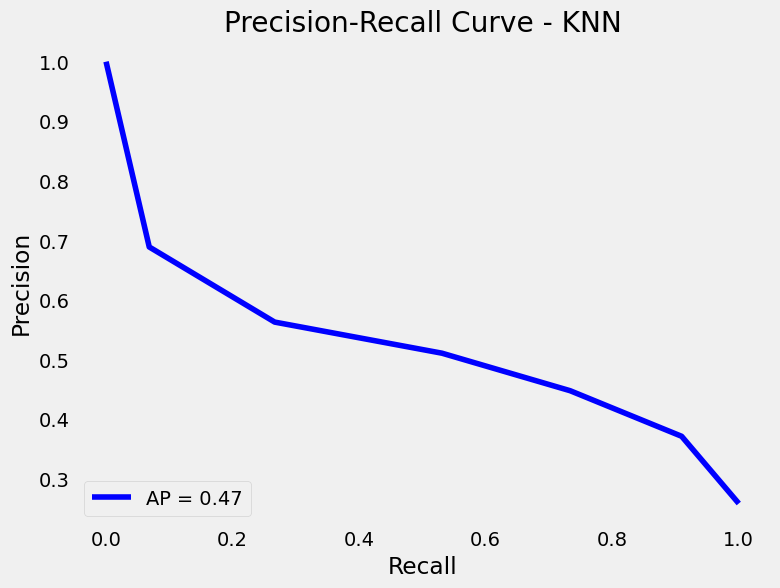

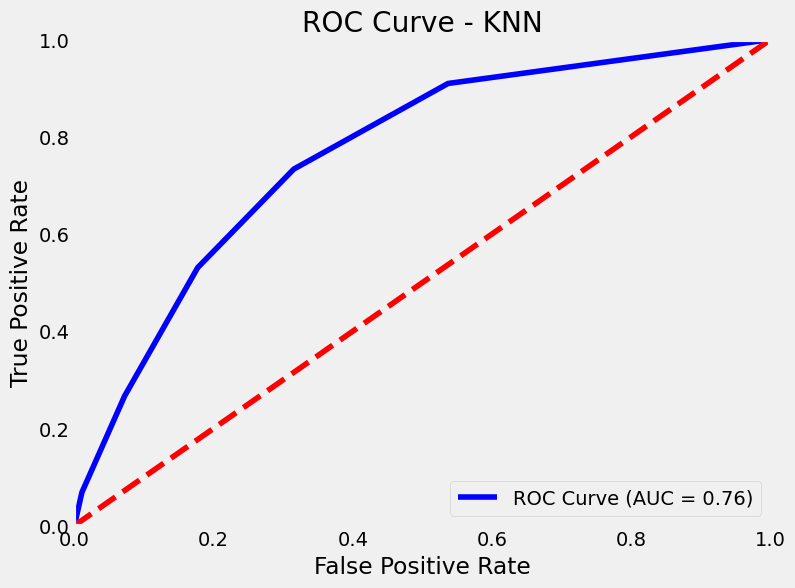

<Figure size 800x600 with 0 Axes>

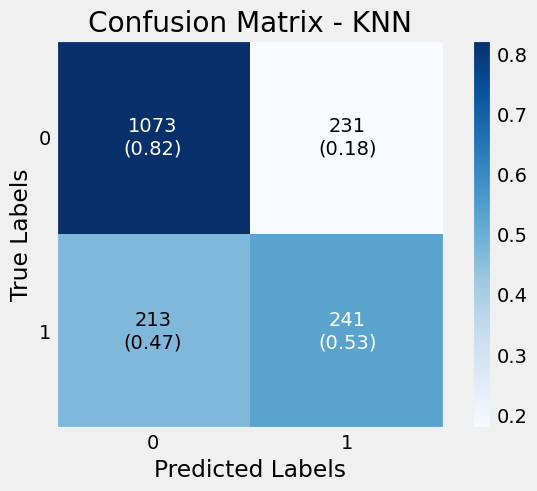

Accuracy (KNN): 0.7474
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1304
           1       0.51      0.53      0.52       454

    accuracy                           0.75      1758
   macro avg       0.67      0.68      0.67      1758
weighted avg       0.75      0.75      0.75      1758



In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Define and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train and evaluate KNN model
train_and_evaluate_model(knn, X_train, y_train, X_test, y_test, 'KNN')


**LogisticRegression**

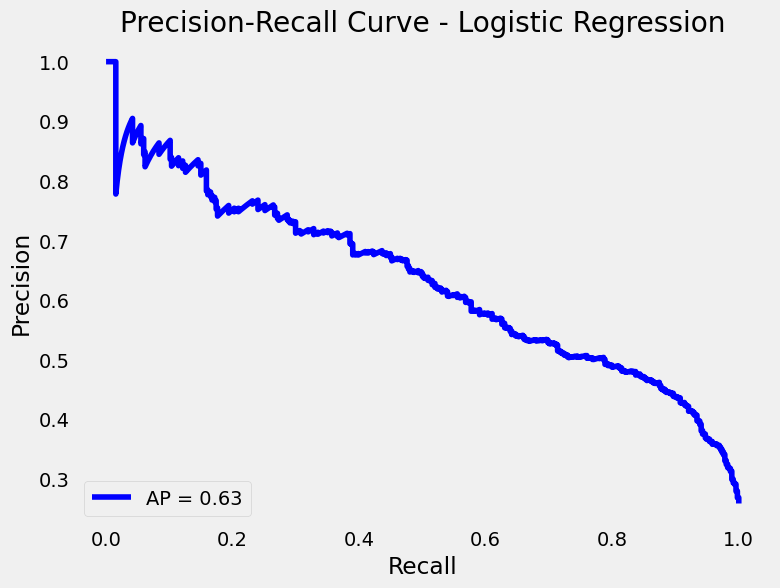

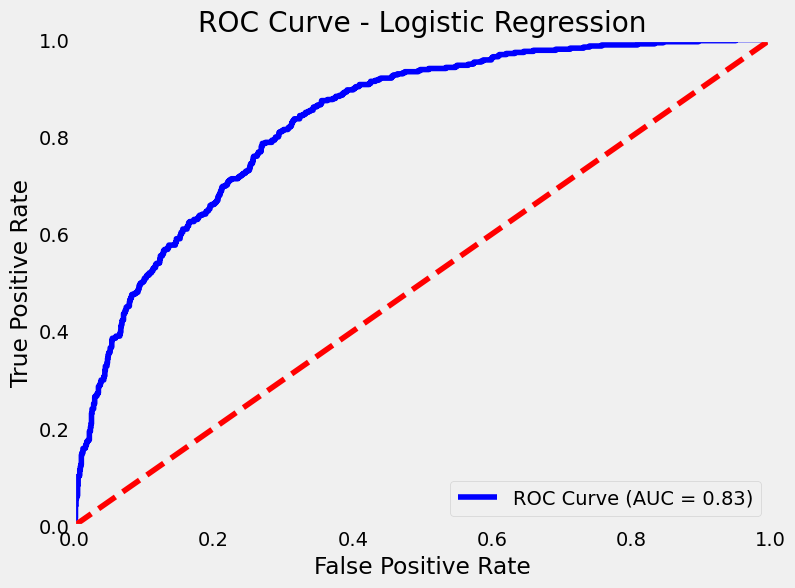

<Figure size 800x600 with 0 Axes>

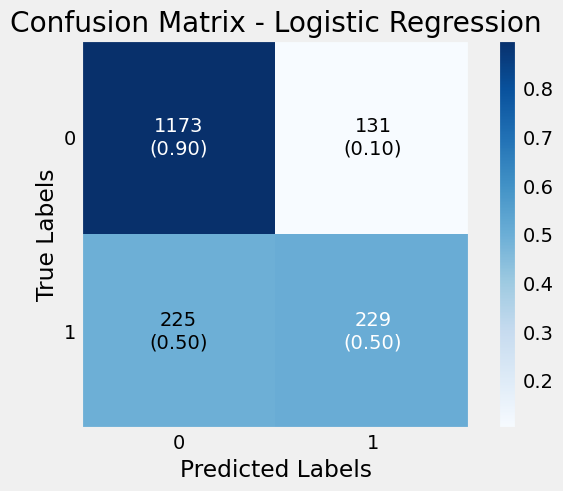

Accuracy (Logistic Regression): 0.7975
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1304
           1       0.64      0.50      0.56       454

    accuracy                           0.80      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758



In [43]:
from sklearn.linear_model import LogisticRegression

# Define and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train and evaluate Logistic Regression model
train_and_evaluate_model(logreg, X_train, y_train, X_test, y_test, 'Logistic Regression')


**Random Forest**

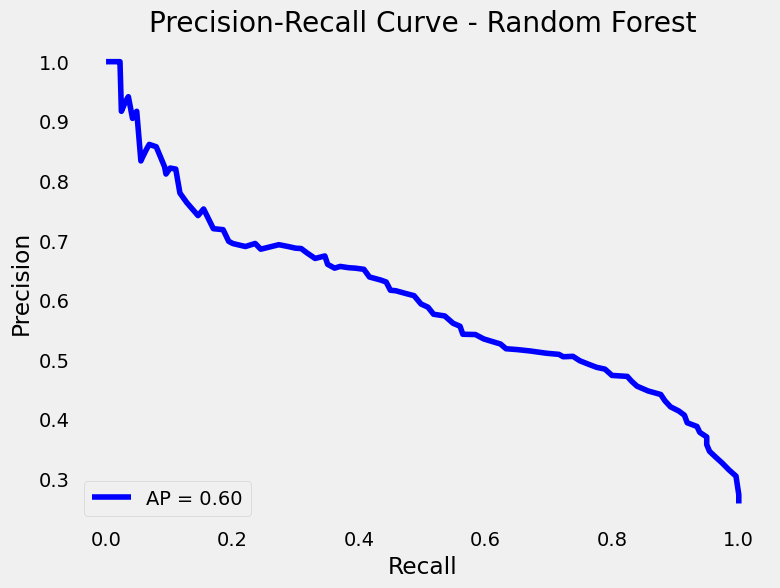

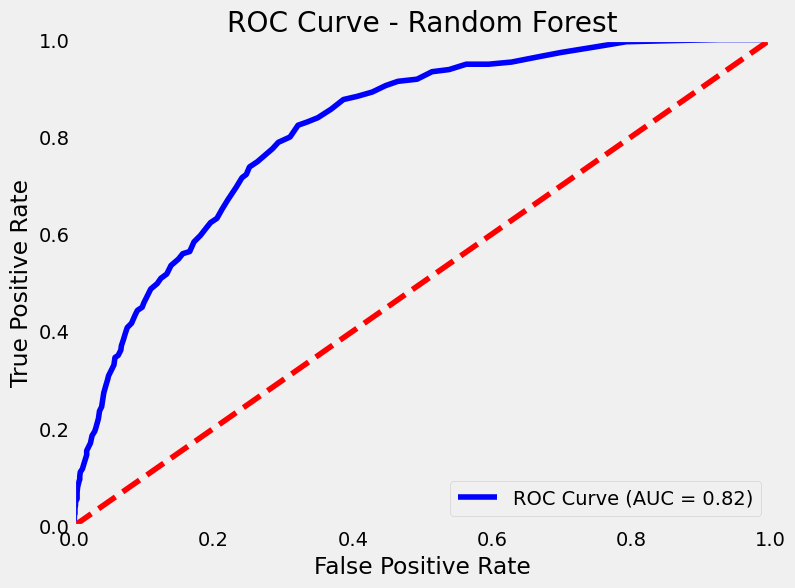

<Figure size 800x600 with 0 Axes>

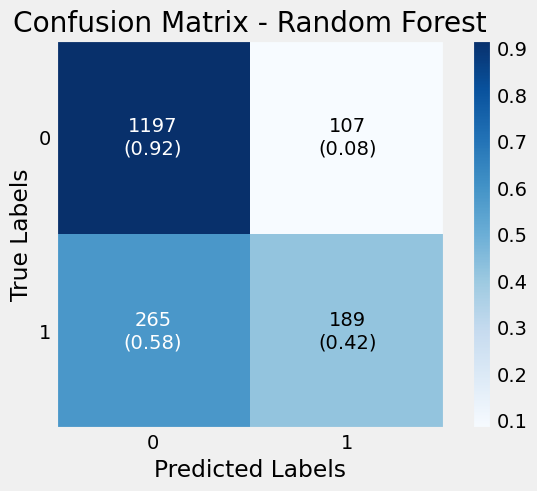

Accuracy (Random Forest): 0.7884
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1304
           1       0.64      0.42      0.50       454

    accuracy                           0.79      1758
   macro avg       0.73      0.67      0.68      1758
weighted avg       0.77      0.79      0.77      1758



In [44]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate Random Forest model
train_and_evaluate_model(rf, X_train, y_train, X_test, y_test, 'Random Forest')
